# 绘图和可视化

## 目录
+ matplotlib API入门
    + Figures和Subplots
        + pyplot.subplots选项
        + 利用fig.add_subplot创建特定布局的Figure和subplot
        + 利用plt.subplots创建特定布局的Figure和subplot
        + 调整subplots周围的间距
    + 颜色、标记和线型
    + 刻度、标签和图例
        + 设置标题、轴标签、刻度以及刻度标签
        + 添加图例
    + 注解以及在Subplot上绘图
    + 将图标保存到文件
        + Figure.savefig的选项
    + matplotlib配置


+ pandas中的绘图函数
    + 线型图
        + Series
            + Series.plot方法的参数
        + DataFrame
            + 专用于DataFrame的plot参数
    + 条形图
        + Series
        + DataFrame
    + 直方图和密度图
        + 直方图
        + 密度图
        + 直方图和密度图的叠加
    + 散点图
        + 散点图
        + 散点图矩阵

In [1]:
from numpy.random import randn
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

## matplotlib API入门

In [ ]:
import matplotlib.pyplot as plt # matplotlib API函数都位于matplotlib.pyplot模块中，这是该模块的引入约定

### Figures和Subplots

#### pyplot.subplots选项
+ nrows  
subplot的行数
+ ncols  
subplot的列数
+ sharex  
所有subplot应该使用相同的X轴刻度（调节xlim将会影响所有subplot）
+ sharey  
所有subplot应该使用相同的Y轴刻度（调节ylim将会影响所有subplot）
+ subplot_kw  
用于创建各subplot的关键字字典
+ ** fig_kw  
创建figure时的其他关键字，如plt.subplots(2,2,figsize=(8,6))

#### 利用fig.add_subplot创建特定布局的Figure和subplot

In [ ]:
fig = plt.figure() # 创建figure对象

In [ ]:
ax1 = fig.add_subplot(2, 2, 1) # 创建2*2的图像，且当前选中的是4个subplot中的第一个，并给实例命名
ax2 = fig.add_subplot(2, 2, 2) # 创建2*2的图像，且当前选中的是4个subplot中的第二个，并给实例命名
ax3 = fig.add_subplot(2, 2, 3) # 创建2*2的图像，且当前选中的是4个subplot中的第三个，并给实例命名

In [ ]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--') # 在最后一个用过的subplot上绘图

In [ ]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3) # fig.add_subplot返回的是AxesSubplot对象，直接调用实例方法可以在相应的格子里绘图
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [ ]:
plt.show() # 将绘制的图像显示出来

#### 利用plt.subplots创建特定布局的Figure和subplot

In [ ]:
fig, axes = plt.subplots(2, 3) # 利用plt.subplots创建2*3的图像，这种方法更为方便、常用
fig # fig是matplotlib.figure.Figure对象

In [ ]:
axes # axes是一个或一组AxesSubplot对象，可以用索引选取相应位置的实例

#### 调整subplots周围的间距

In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None) # wspace和hspace用于控制宽度和高度的百分比，plt.show()后还可以通过Configure subplots选项调整

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5) # 通过索引选取相应位置的AxesSubplot实例，并用实例的方法绘图
plt.subplots_adjust(wspace=0, hspace=0) # 将subplot之间的间距收缩到了0
plt.show()

### 颜色、标记和线型

In [ ]:
plt.plot(randn(30).cumsum(), 'ko--') # 格式字符串，按照颜色、标记、线型的顺序排列
plt.show()

In [ ]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o') # 同以上代码作用相同
plt.show()

In [ ]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default') # 非实际数据点默认按照线性方式插值
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # drawstyle参数控制，线型图中非实际数据点的插值方式
plt.legend(loc='best')
plt.show()

### 刻度、标签和图例

#### 设置标题、轴标签、刻度以及刻度标签

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 设置X轴的刻度位置
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') # 设置X轴的刻度标签
ax.set_title('My first matplotlib plot') # 设置标题
ax.set_xlabel('Stages') # 设置X轴标签
plt.show()

#### 添加图例

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') # 在添加subplot时传入label参数
ax.plot(randn(1000).cumsum(), 'k--', label='two') # 要从图例中去除一个或多个元素，不传入label或传入label='_nolegend_'即可
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best') # loc参数控制图例在图中的位置
plt.show()

### 注解以及在Subplot上绘图

In [ ]:
# 注解可以通过text、arrow和annotate等函数进行添加

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

In [ ]:
# 部分图形对象可以在matplotlib.pyplot中找到，但完整的图形对象集合位于matplotlib.patches中

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) # 先创建图形对象
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect) # 再通过ax.add_patch将图形对象添加到subplot中
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图标保存到文件

#### Figure.savefig的选项
+ fname  
含有文件路径的字符串或Python的文件型对象。图像格式由文件扩展名推断得出，例如，.pdf推断出PDF，.png推断出PNG
+ dpi  
图像分辨率（每英寸点数），默认为100
+ facecolor、edgecolor  
图像的背景色，默认为“w”（白色）
+ format  
显式设置文件格式（“png”、“pdf”、“svg”、“ps”、“eps”……）
+ bbox_inches  
图表需要保存的部分。如果设置为“tight”，则将尝试剪除图表周围的空白部分

In [ ]:
fig = plt.figure()

In [ ]:
fig.savefig('figpath.svg') # 将图表保存为SVG文件，也可以用Figure对象的实例方法savefig

In [ ]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight') # dpi控制“每英寸点数”分辨率，bbox_inches控制图表周围的空白部分（'tight'最小白边）

In [ ]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer) # savefig可以写入任何文件型的对象，比如StringIO
plot_data = buffer.getvalue()

### matplotlib配置

In [ ]:
plt.rc('figure', figsize=(10, 10))

## pandas中的绘图函数

### 线型图
Series和DataFrame的plot方法，在默认情况下生成线型图

#### Series

##### Series.plot方法的参数
+ label  
用于图例的标签
+ ax  
要在其上进行绘制的matplotlib subplot对象。如果没有设置，则使用当前matplotlib subplot
+ style  
将要传给matplotlib的风格字符串（如'ko--'）
+ alpha  
图表的填充不透明度（0到1之间）
+ kind  
可以是'line'、'bar'、'barh'、'kde'
+ logy  
在Y轴上使用对数标尺
+ use_index  
将对象的索引用作刻度标签
+ rot  
旋转刻度标签（0到360）
+ xticks  
用作X轴刻度的值
+ yticks  
用作Y轴刻度的值
+ xlim  
X轴的界限（例如[0，10])
+ ylim  
Y轴的界限
+ grid  
显示轴网格线（默认打开）

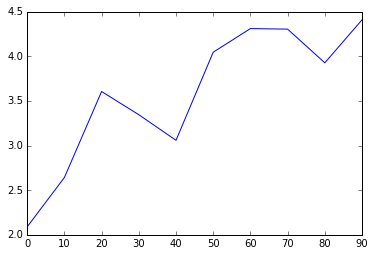

In [3]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot() # Series对象的索引用以绘制X轴，可以通过use_index=False禁用该功能（不禁用X轴0-90，禁用X轴0-9）

#### DataFrame

##### 专用于DataFrame的plot参数
+ subplots  
将各个DataFrame列绘制到单独的subplot中
+ sharex  
如果subplots=True，则共用同一个X轴，包括刻度和界限
+ sharey  
如果subplots=True，则共用同一个Y轴
+ figsize  
表示图像大小的元组
+ title  
表示图像标题的字符串
+ legend  
添加一个subplot图例（默认为True）
+ sort_columns  
以字母表顺序绘制各列，默认使用当前列顺序

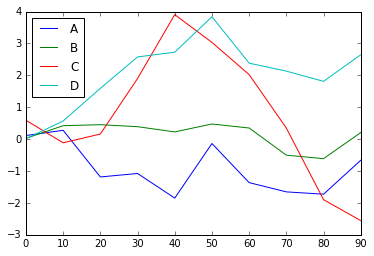

In [4]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot() # DataFrame的plot方法在一个subplot中为各列绘制一条线，并自动创建图例

### 条形图
在生成线型图的代码中加上**kind='bar'（垂直条形图）**或**kind='barh'（水平条形图）**即可生成条形图

#### Series

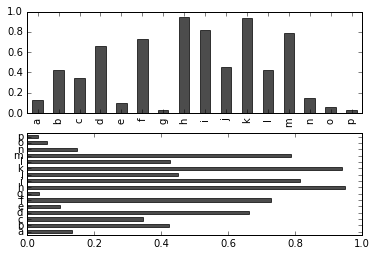

In [5]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [6]:
s = Series([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5])

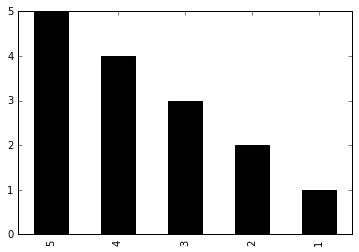

In [7]:
s.value_counts().plot(kind='bar', color='k') # 利用value_counts图形化显示Series中各值的出现频率

#### DataFrame

In [8]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.316804,0.271114,0.899285,0.081664
two,0.815059,0.544089,0.358260,0.845504
three,0.380820,0.560924,0.902509,0.371912
four,0.079563,0.559883,0.784823,0.667582
five,0.349810,0.623600,0.716897,0.595388
six,0.103491,0.892571,0.131660,0.816209


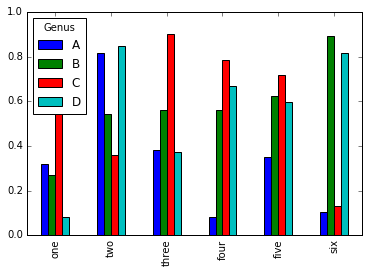

In [9]:
df.plot(kind='bar') # 柱状图会将每一行的值分为一组，各列的名称“Genus”被用作图例的标题

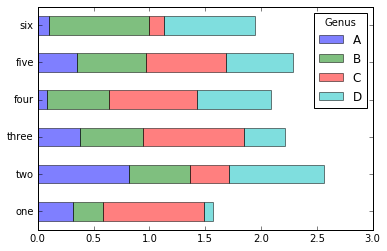

In [10]:
df.plot(kind='barh', stacked=True, alpha=0.5) # 设置stacked=True即可为DataFrame生成堆积柱状图，每行的值会被堆积起来

In [11]:
tips = pd.read_csv('./data/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
# 选取聚会规模为2-5人的列
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


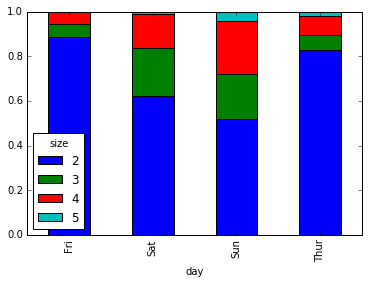

In [12]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0) # 规格化，计算不同聚会规模所占比例
party_pcts.plot(kind='bar', stacked=True)

### 直方图和密度图
直方图：一种对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

#### 直方图

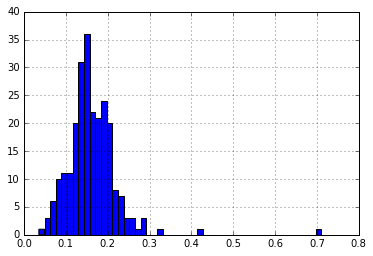

In [13]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # 计算小费在总消费所占比例
tips['tip_pct'].hist(bins=50)

#### 密度图

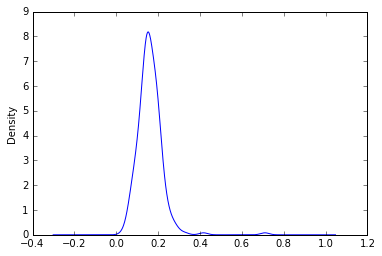

In [14]:
tips['tip_pct'].plot(kind='kde') # 调用plot方法时加上kind='kde'生成密度图

#### 直方图和密度图的叠加

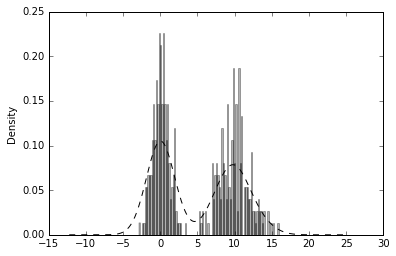

In [15]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True) # 注意设置normed=True
values.plot(kind='kde', style='k--')

### 散点图

In [16]:
macro = pd.read_csv('./data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


#### 散点图

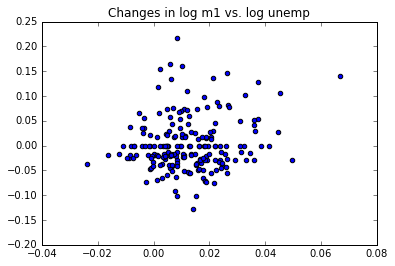

In [17]:
plt.scatter(trans_data['m1'], trans_data['unemp']) # scatter方法绘制散点图
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp')) # 给图添加标题

#### 散点图矩阵

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF89198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DED8FD0>]], dtype=object)

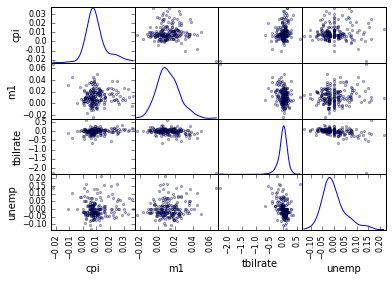

In [18]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3) # DataFrame的scatter_matrix方法绘制散点图矩阵，在对角线放置密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1626A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F415F60>]], dtype=object)

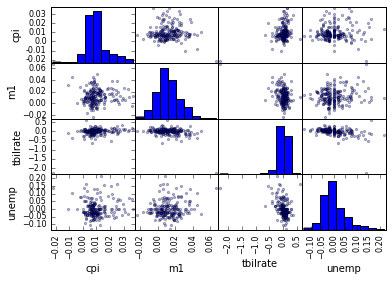

In [19]:
pd.scatter_matrix(trans_data, diagonal='hist', color='k', alpha=0.3) # DataFrame的scatter_matrix方法绘制散点图矩阵，在对角线放置直方图

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [ ]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
data['CATEGORY'][:6]

In [ ]:
data.describe()

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [ ]:
dummy_frame.ix[:, :6].info()

In [ ]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [ ]:
data.ix[:, 10:15].info()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [ ]:
make_plot()

In [ ]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')